In [16]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn import linear_model

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(df_train.isnull().sum())


ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64


In [5]:
df_train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [6]:
# the Objects need to be converted
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
objects = ['object']

In [7]:
df_train_num = df_train.select_dtypes(include=numerics)
df_train_cat = df_train.select_dtypes(include=objects)

In [8]:
print(df_train_num.shape, df_train_cat.shape)

(4209, 370) (4209, 8)


In [9]:
df_test_num = df_test.select_dtypes(include=numerics)
df_test_cat = df_test.select_dtypes(include=objects)

In [10]:
print(df_test_num.shape, df_test_cat.shape)

(4209, 369) (4209, 8)


#

In [11]:
df_train_cat['X1'].nunique(),df_test_cat['X1'].nunique()

(27, 27)

In [12]:
cols = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

for col in cols:
    print(df_train_cat[col].nunique(),df_test_cat[col].nunique())

47 49
27 27
44 45
7 7
4 4
29 32
12 12
25 25


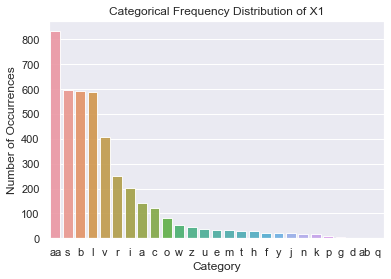

In [17]:
cat_count = df_train_cat['X1'].value_counts()
sns.set(style="darkgrid")
sns.barplot(cat_count.index, cat_count.values, alpha=0.9)
plt.title('Categorical Frequency Distribution of X1')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

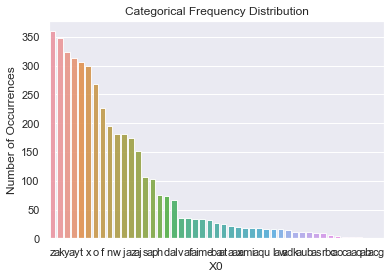

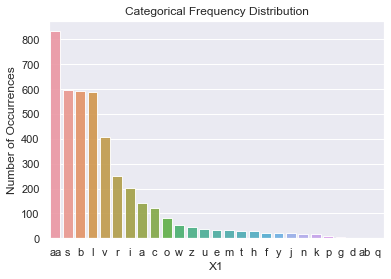

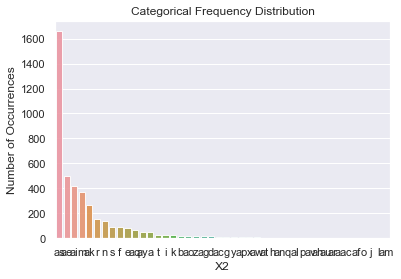

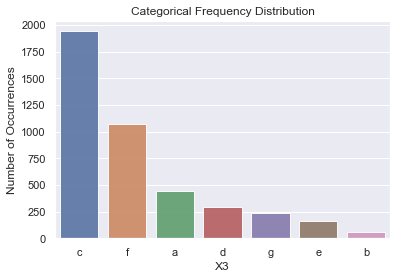

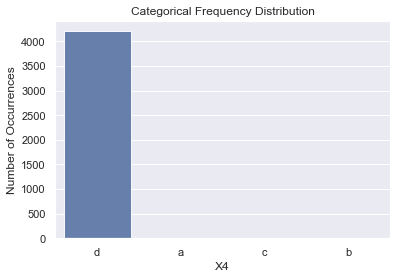

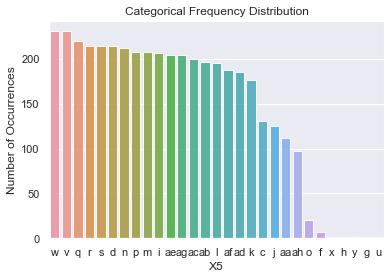

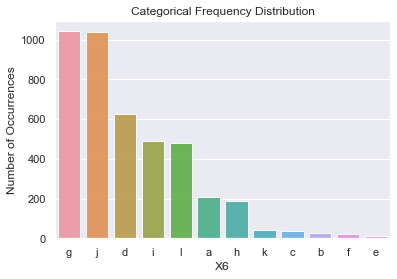

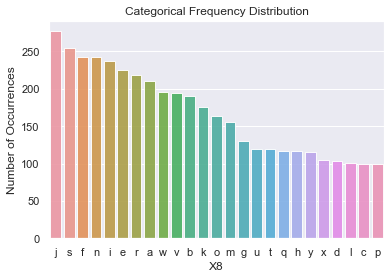

In [18]:
cols = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

for col in cols: 
    cat_count = df_train_cat[col].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(cat_count.index, cat_count.values, alpha=0.9)
    plt.title('Categorical Frequency Distribution')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.show()

In [19]:
cat_count.index

Index(['j', 's', 'f', 'n', 'i', 'e', 'r', 'a', 'w', 'v', 'b', 'k', 'o', 'm',
       'g', 'u', 't', 'q', 'h', 'y', 'x', 'd', 'l', 'c', 'p'],
      dtype='object')

### Use Dummy Variables to convert coategorical Varaibles

In [20]:
data = df_train.append(df_test, ignore_index=True)
data = pd.get_dummies(data)

C:\Python\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [21]:
data.index

RangeIndex(start=0, stop=8418, step=1)

In [22]:
# split in to training and test data again
train, test = data[0:len(df_train)], data[len(df_train):]

In [23]:
train.shape , test.shape

((4209, 581), (4209, 581))

In [24]:
train.head()

,ID,X10,X100,X101,X102,X103,X104,X105,X106,X107,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X_train_1 = train.drop(['y','ID'],axis=1)
y_train_1 = train.y

X_test_1 = test.drop(['y','ID'],axis=1)

### Ridge Regression

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_train_1,
                                                   y_train_1,
                                                   test_size = 0.25,
                                                   random_state=4)

In [27]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [28]:
alpha = .3

model = Ridge(alpha=alpha)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c_score_test = r2_score(y_test, model.predict(X_test))
c_score_train = r2_score(y_test, model.predict(X_test))

In [29]:
print('Training Score       : %.3f' %c_score_train)
print('Testing Score        : %.3f' %c_score_test)
print("Mean squared error   : %.2f" % mean_squared_error(y_test, y_pred))

Training Score       : 0.534
Testing Score        : 0.534
Mean squared error   : 71.92


In [30]:
# The coefficients
print('Coefficients: \n', model.coef_)


Coefficients: 
 [ 1.42978737e-01 -8.51161204e-01 -5.56744200e-01 -7.86548384e-01
 -4.29778759e+00  6.75658308e+00  2.43102909e+00  1.86360693e+00
  0.00000000e+00 -1.96295506e+00  8.12334751e-01  0.00000000e+00
 -1.30374323e+00  5.80426617e-01 -1.88953851e+00  1.30911189e+00
 -4.21613472e-01  2.61581807e+00  5.69653848e-01  2.17124653e+00
  1.32290522e+00  1.32290522e+00  2.49633108e+00 -3.00215976e-01
 -1.24283665e+00  5.20647395e+00  2.76491586e-01 -5.71025086e-01
  4.65269887e-01 -4.83065230e+00 -3.54282068e+00 -5.84442501e+00
  2.57004128e+00  3.54282068e+00 -3.63471373e+00 -5.21187782e+00
  1.33091689e+00  1.30911189e+00 -3.06993356e+00 -4.85394981e+00
 -2.62287064e-01  9.58588529e-01 -2.45453599e+00  1.85338248e+00
  9.13287009e-01 -8.44898094e-01 -1.12644849e-02 -2.06344990e+00
  2.25028547e+00  6.57064320e-01  9.58588529e-01  1.30911189e+00
 -2.30122433e+00  1.25156715e+00 -3.86232660e-02  6.18428007e-01
  5.41538889e-01 -1.31986478e+00 -4.51674302e-01  1.26124837e+00
  4.14515

### can consider dropping the following columns
https://www.kaggle.com/oysteijo/pca-and-t-sne

In [31]:
desc = df_train.describe().transpose()
zero_std = desc.loc[desc['std']==0].index.values

In [32]:
desc

,count,mean,std,min,25%,50%,75%,max
ID,4209.0,4205.960798,2437.608688,0.00,2095.00,4220.00,6314.00,8417.00
y,4209.0,100.669318,12.679381,72.11,90.82,99.15,109.01,265.32
X10,4209.0,0.013305,0.114590,0.00,0.00,0.00,0.00,1.00
X11,4209.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
X12,4209.0,0.075077,0.263547,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...
X380,4209.0,0.008078,0.089524,0.00,0.00,0.00,0.00,1.00
X382,4209.0,0.007603,0.086872,0.00,0.00,0.00,0.00,1.00
X383,4209.0,0.001663,0.040752,0.00,0.00,0.00,0.00,1.00
X384,4209.0,0.000475,0.021796,0.00,0.00,0.00,0.00,1.00


In [33]:
zero_std

array(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'], dtype=object)

### Principal component analysis
https://www.kaggle.com/oysteijo/pca-and-t-sne

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca2 = PCA(n_components=2)
pca2_results = pca2.fit_transform(X_train)

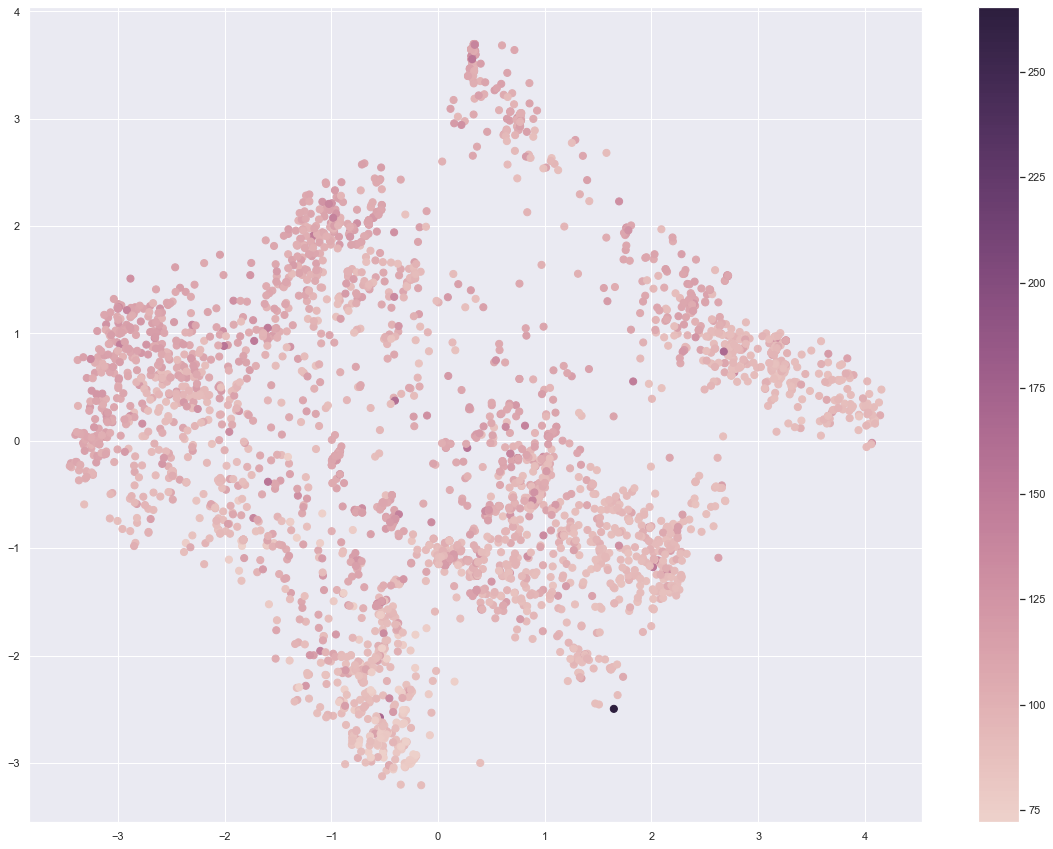

In [36]:
cmap = sns.cubehelix_palette(as_cmap=True)
f,ax = plt.subplots(figsize=(20,15))
points = ax.scatter(pca2_results[:,0],pca2_results[:,1],c=y_train,s=50, cmap=cmap )
f.colorbar(points)
plt.show()

In [ ]:
#distribution of y

In [37]:
df_train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

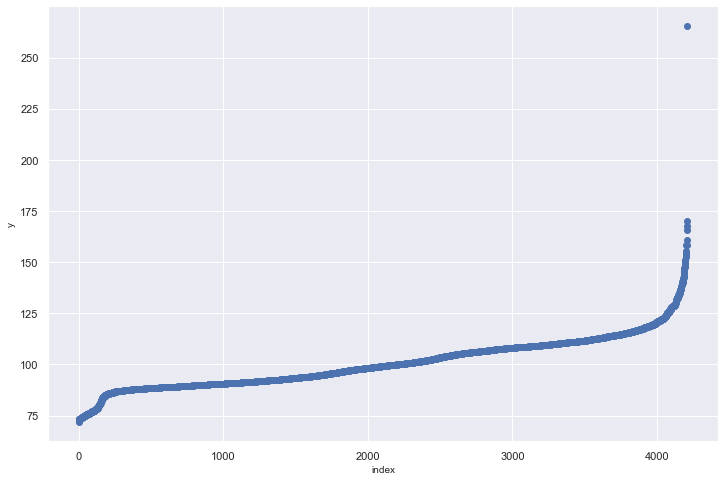

In [38]:
plt.figure(figsize=(12,8))
plt.scatter(range(df_train.shape[0]), np.sort(df_train.y.values))

plt.xlabel('index',fontsize=10)
plt.ylabel('y', fontsize=10);

In [39]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [40]:
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
#print (f'Coefficients : {lin_reg.coef_}')
#print (f'Intercept    : {lin_reg.intercept_}')
print (f'R^2          : {lin_reg.score(X_train,y_train)}')
print (f'R^2          : {lin_reg.score(X_test,y_test)}')
print("MSE          : %.2f" % mean_squared_error(y_test, y_pred))

R^2          : 0.6256912950535034
R^2          : -1.2109278111685196e+23
MSE          : 18700863173589891415015424.00


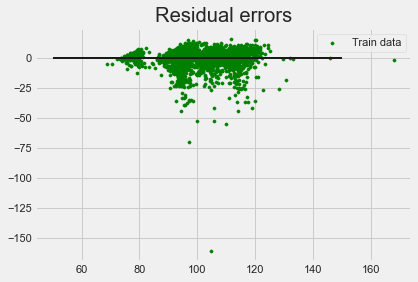

In [41]:
plt.style.use('fivethirtyeight') 
  
# plotting residual errors in training data 
plt.scatter(lin_reg.predict(X_train), lin_reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 50, xmax = 150, linewidth = 2) 

plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
plt.show() 

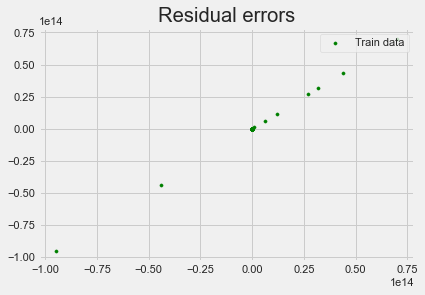

In [42]:
plt.style.use('fivethirtyeight') 
  
# plotting residual errors in training data 
plt.scatter(lin_reg.predict(X_test), lin_reg.predict(X_test) - y_test, 
            color = "green", s = 10, label = 'Train data') 

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 50, xmax = 150, linewidth = 2) 

plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
plt.show() 

In [43]:
y_test.head()

4108     85.17
1800     93.94
3879    111.34
1651     88.67
2602    102.09
Name: y, dtype: float64

In [44]:
residual = lin_reg.predict(X_test)-y_test
np.sort(residual.values)

array([-9.49326912e+13, -4.40507666e+13, -5.85237500e+01, ...,
        3.17045267e+13,  4.36669603e+13,  7.01435348e+13])

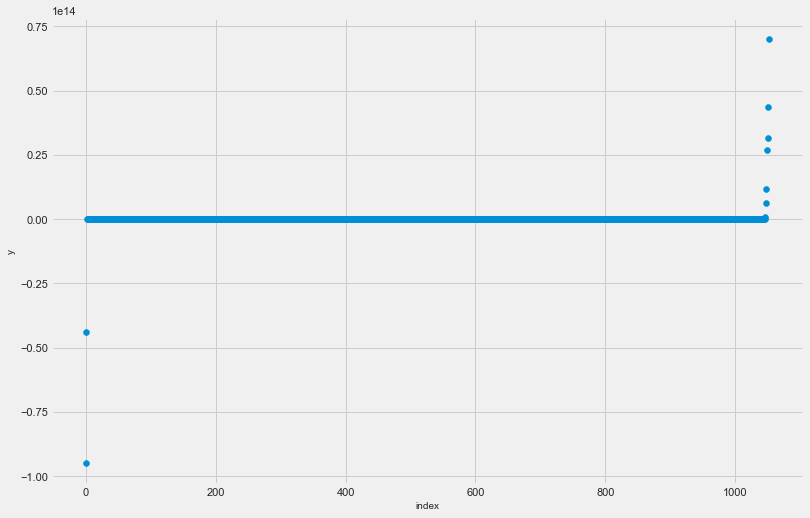

In [45]:
plt.figure(figsize=(12,8))
plt.scatter(range(len(residual)), np.sort(residual.values))
plt.xlabel('index',fontsize=10)
plt.ylabel('y', fontsize=10);

In [46]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
import matplotlib.pyplot as plt
#import statsmodels.stats.api as sms

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)
plt.figure(figsize=(20,5))
plt.show()

<Figure size 1440x360 with 0 Axes>